In [1]:
%load_ext autoreload
%autoreload 2
import stim
import numpy as np
import matplotlib.pyplot as plt
import sinter
from typing import List
import surface_general_defect
from surface_general_defect import LogicalQubit

In [43]:
print("vertical distance:",logical_qubit.actual_distance_vertical())
print("horizontal distance:",logical_qubit.actual_distance_horizontal())
print("diameter of the largest cluster:", logical_qubit.diameter_biggest_cluster())
print("num of defect clusters in the interior:",logical_qubit.num_clusters())
print("num of disabled data qubits:", logical_qubit.num_disabled_data())
print('num of shortest logical operators (vertical and horizontal):',logical_qubit.all_shortest_paths_v, logical_qubit.all_shortest_paths_h)

vertical distance: 4
horizontal distance: 5
diameter of the largest cluster: 0
num of defect clusters in the interior: 0
num of disabled data qubits: 5
num of shortest logical operators (vertical and horizontal): 29 36


In [2]:
def gen_faulty_qubit_coords(d):
    return [(d-1, i) for i in range(2, 2*d-3, 4)]

In [17]:
def gen_circuit_with_deforms(d, r, missing_coords):
    # error probs aren't the point
    logical_qubit = surface_general_defect.LogicalQubit(d, 0.008, 0.001, 0.01, missing_coords=missing_coords, get_metrics=True)
    if len(logical_qubit.defect) == 0:
        circuit = logical_qubit.generate_stim(r)
    else:
        circuit = logical_qubit.generate_stim_shell(r)
    return logical_qubit, circuit

In [28]:
def gen_stim_file(d, r, missing_coords, folder):
    if missing_coords is None:
        missing_coords = []
    if type(missing_coords) is int:
        missing_coords = gen_faulty_qubit_coords(d)[:missing_coords]
    
    logical_qubit, circuit = gen_circuit_with_deforms(d, r, missing_coords)

    import os
    os.makedirs(folder, exist_ok=True)
    circuit.to_file(f"{folder}/surface_d{d}r{r}_cut{len(missing_coords)}.stim")

In [20]:
faulty_qubits = gen_faulty_qubit_coords(7)
faulty_qubits

[(6, 2), (6, 6), (6, 10)]

In [23]:
logical_qubit, c = gen_circuit_with_deforms(7, 15, faulty_qubits)

In [29]:
gen_stim_file(7, 15, faulty_qubits, "stim_files")

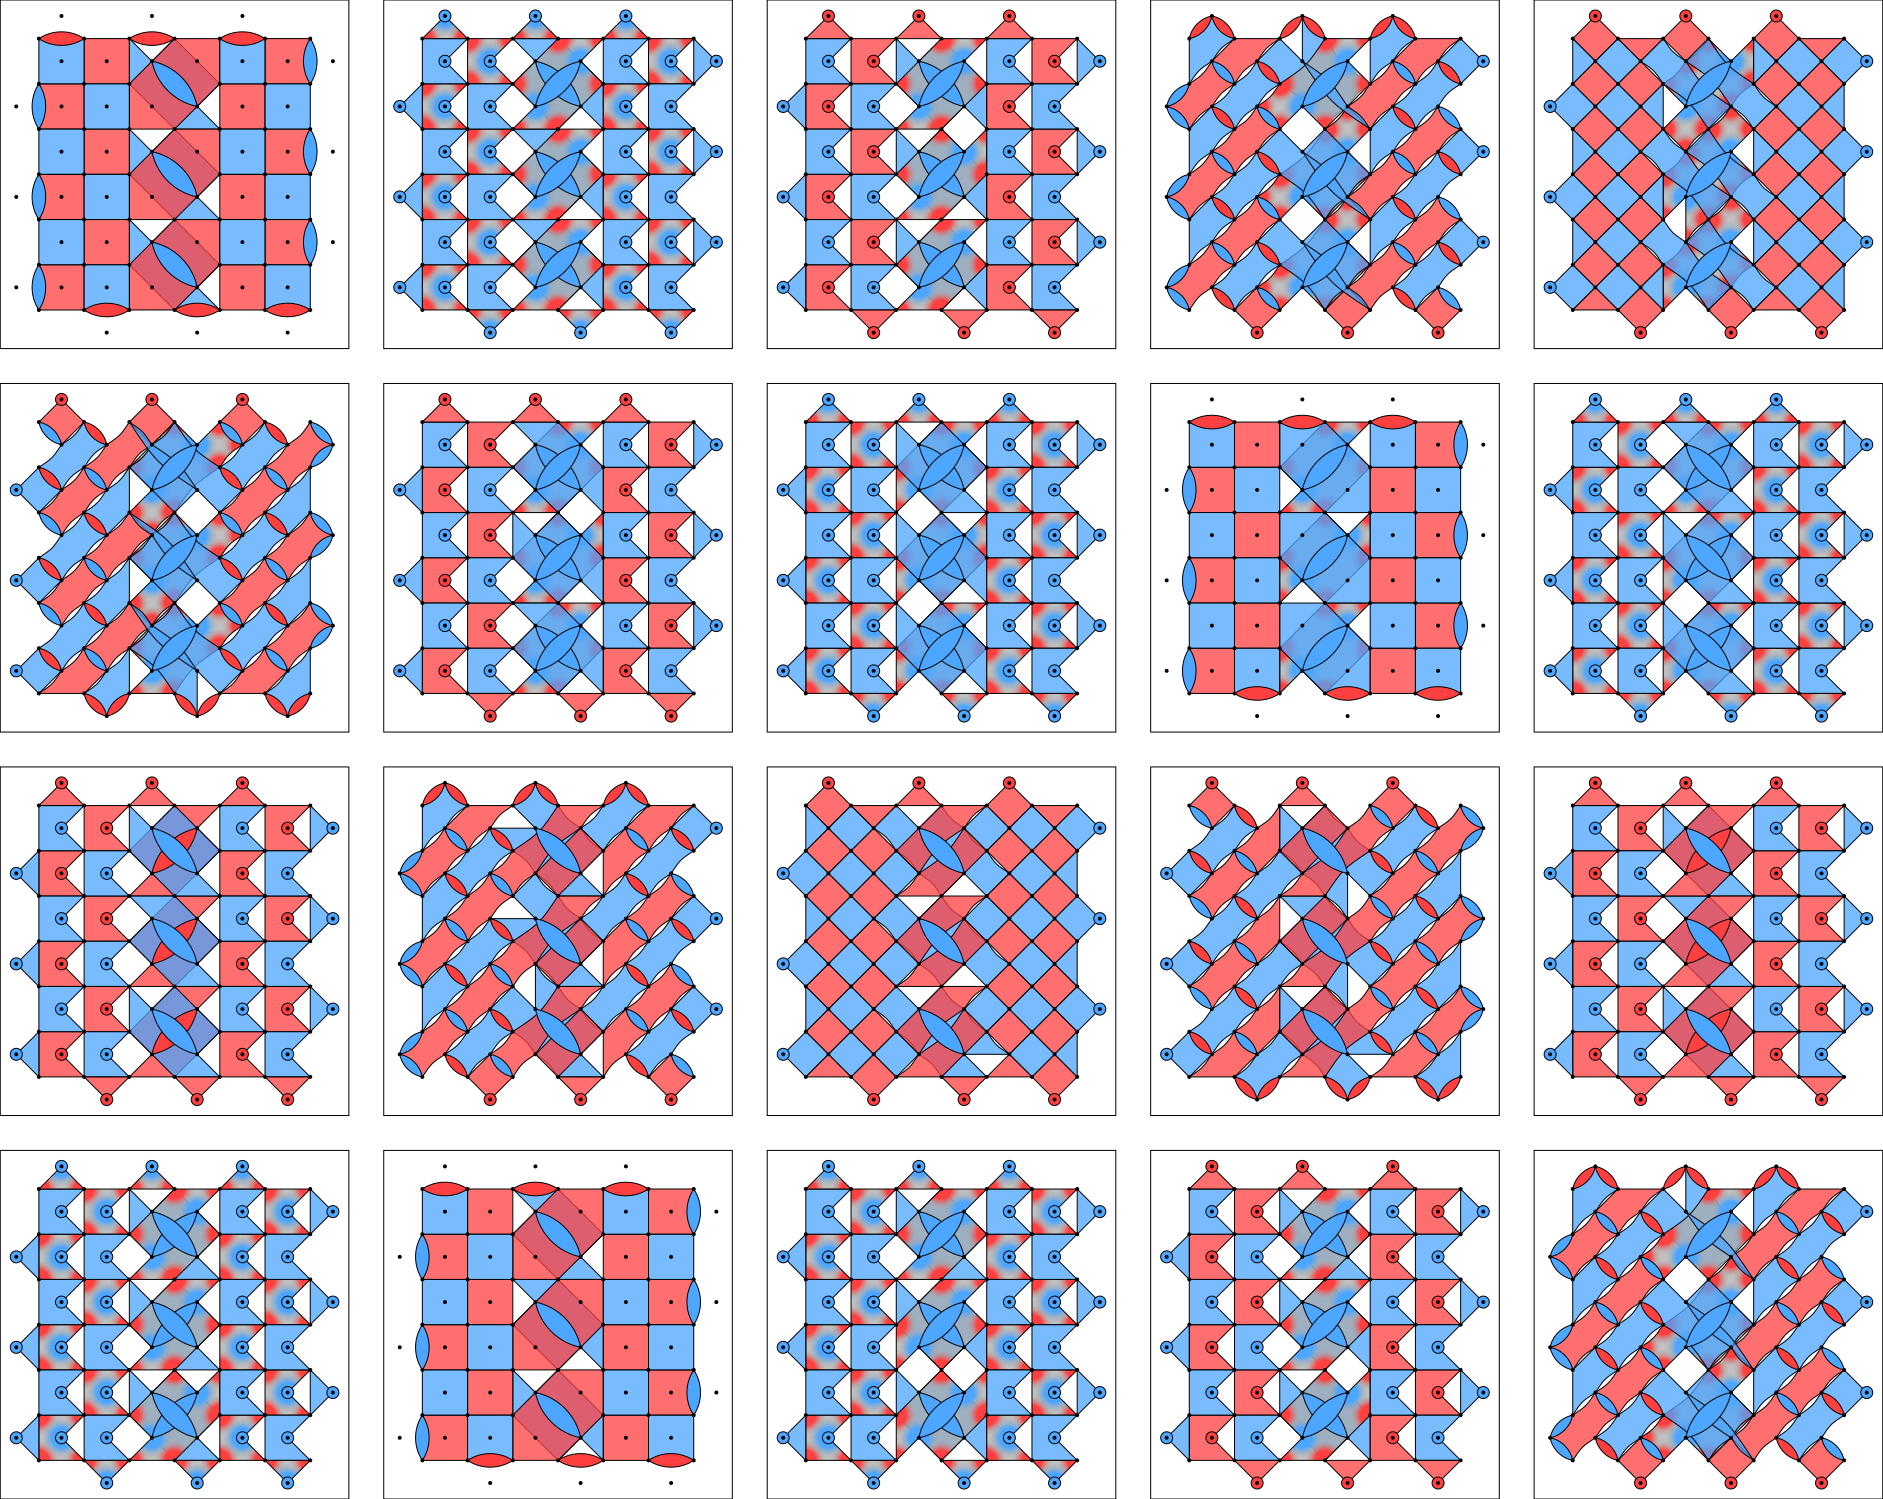

In [24]:
c.diagram("detector-slice-svg", tick=range(40, 60))

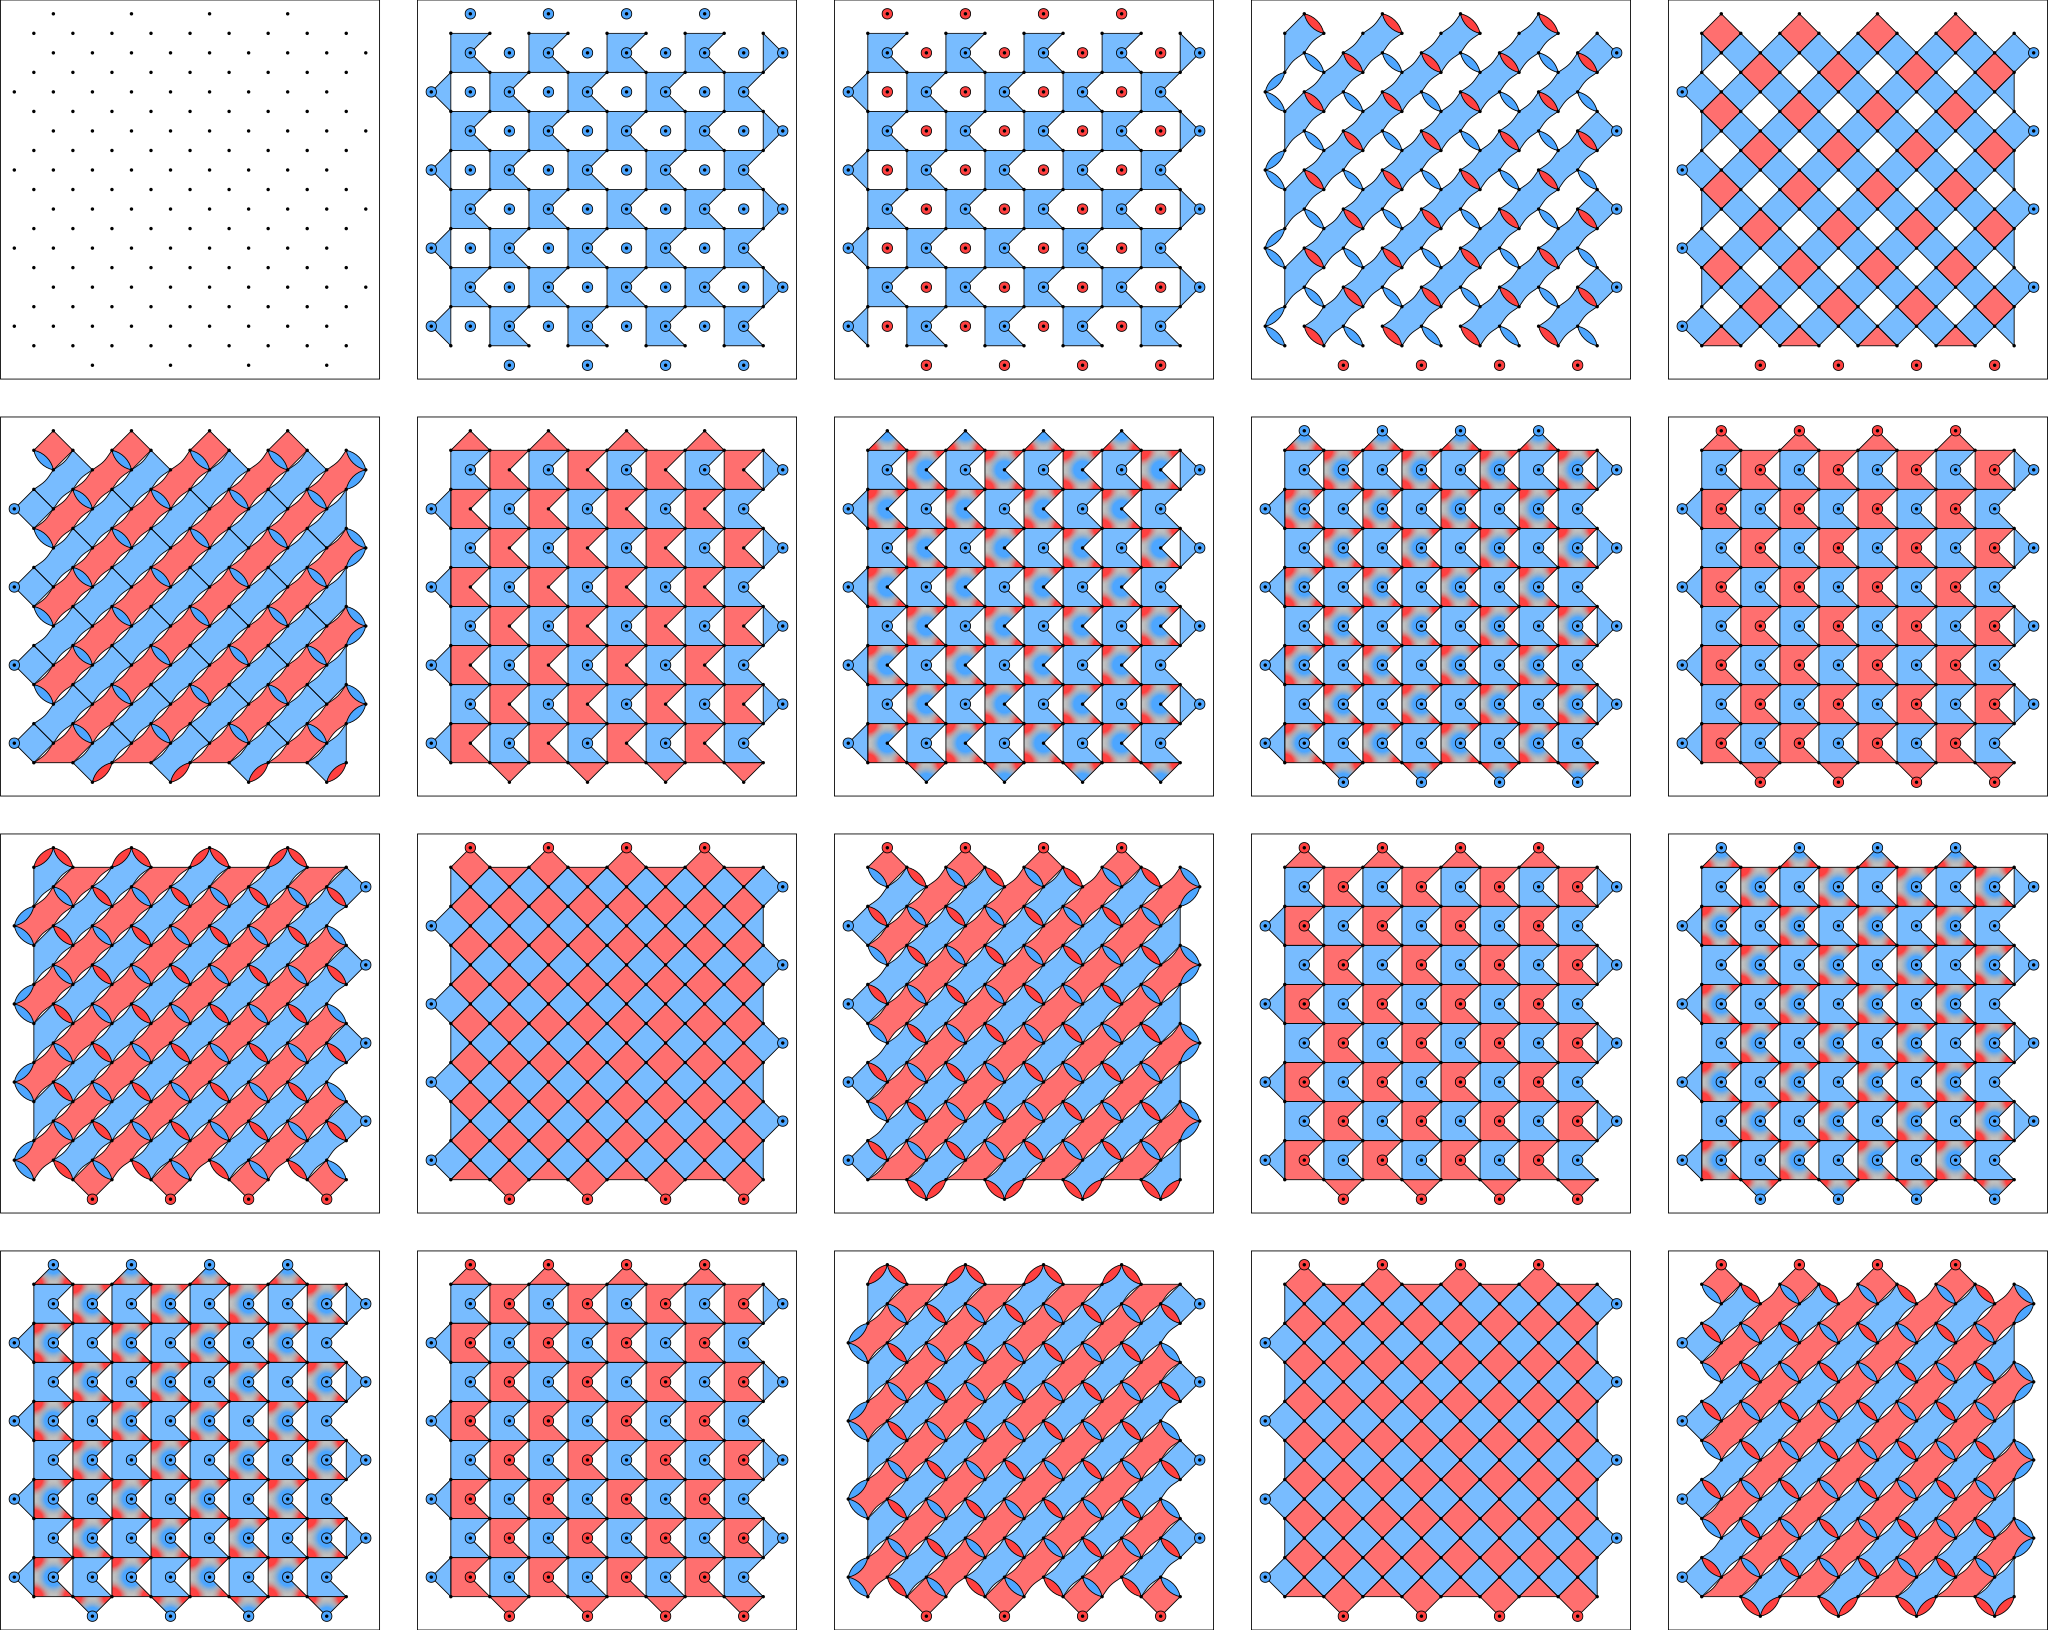

In [152]:
x = stim.Circuit.generated(
    "surface_code:rotated_memory_z",
    rounds=9 * 3,
    distance=9,
    before_round_data_depolarization=0.001,
)
x.diagram("detector-slice-svg", tick=range(20))